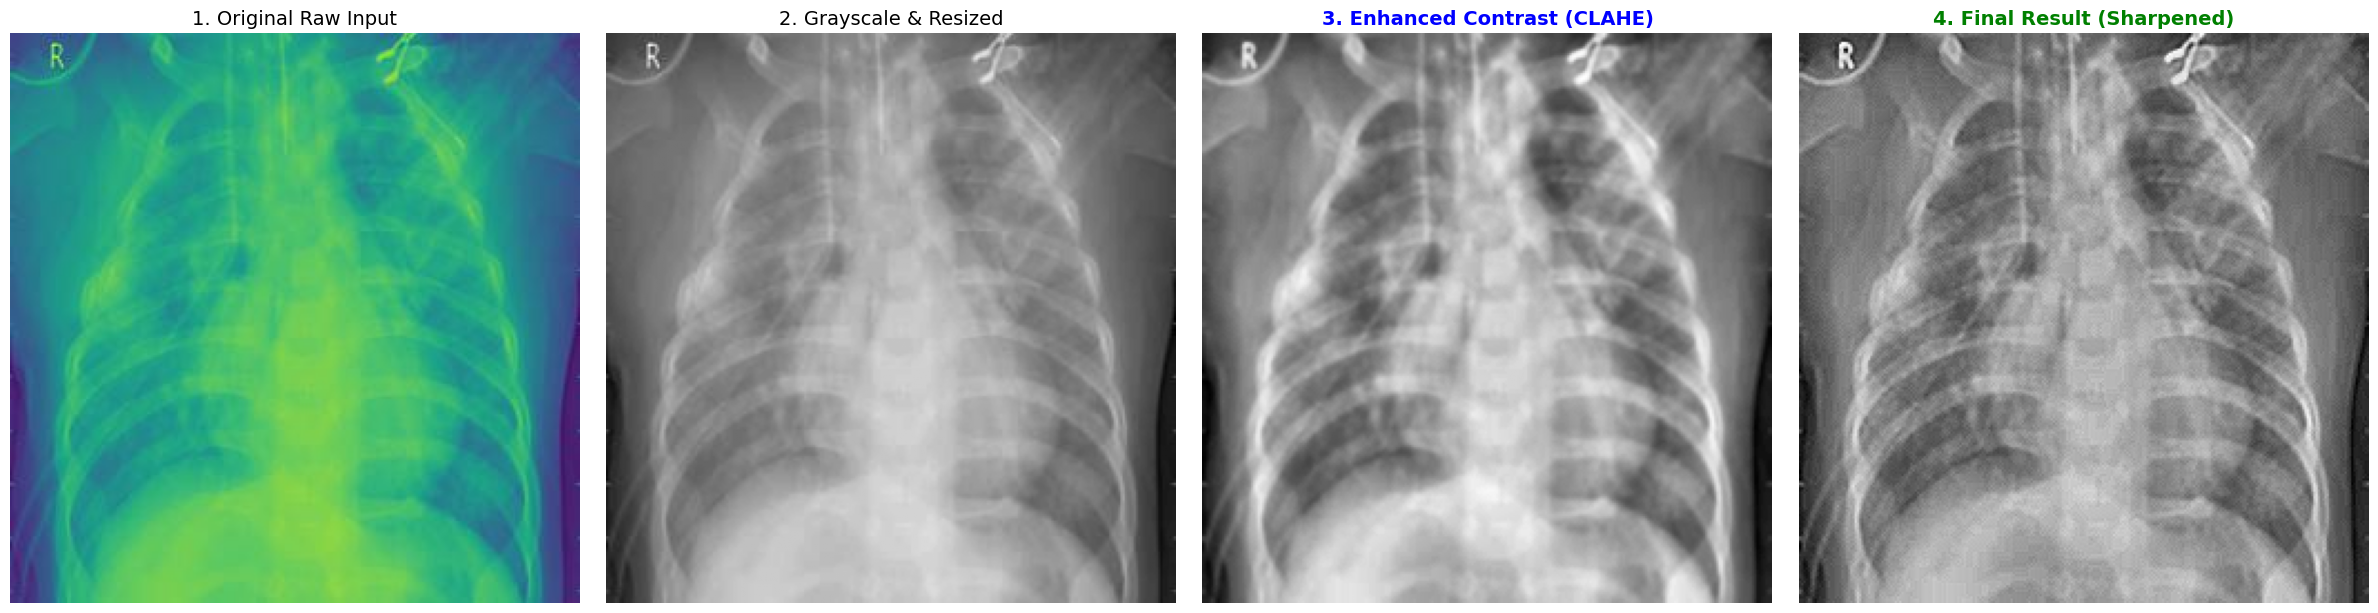

Visualization pipeline completed successfully!


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess_and_visualize_pro(image_path, target_size=(256, 256)):
    # 1. Read the image
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Cannot read image at {image_path}")
        return None

    # --- Display Version (Original Color) ---
    # We convert BGR to RGB just for visualization purposes
    original_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Preprocessing Pipeline ---
    
    # Step 1: Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Resize
    resized = cv2.resize(gray, target_size, interpolation=cv2.INTER_AREA)

    # Step 3: Denoising (Gaussian Blur)
    # Reduces thermal noise while keeping structural details
    denoised = cv2.GaussianBlur(resized, (3, 3), 0)

    # Step 4: Contrast Enhancement using CLAHE (Instead of Log Transform)
    # CLAHE: Contrast Limited Adaptive Histogram Equalization.
    # It enhances local contrast without over-amplifying noise or washing out the image.
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_contrast = clahe.apply(denoised)

    # Step 5: Edge Enhancement (Sharpening)
    # Highlights the boundaries of lung opacities and ribs
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(enhanced_contrast, -1, kernel)

    return original_rgb, resized, enhanced_contrast, sharpened

# ==========================================
# Main Execution
# ==========================================

# Define the path to your test image
test_image_path = r"C:\DataSet\Lung X-Ray Image\Lung X-Ray Image\Viral Pneumonia\65.jpg"

results = preprocess_and_visualize_pro(test_image_path)

if results:
    original_rgb, resized, enhanced_contrast, sharpened = results

    # Set up the figure size
    plt.figure(figsize=(24, 6)) 
    
    # 1. Original Input
    plt.subplot(1, 4, 1)
    plt.title("1. Original Raw Input", fontsize=14)
    plt.imshow(original_rgb)
    plt.axis('off')

    # 2. Grayscale & Resized
    plt.subplot(1, 4, 2)
    plt.title("2. Grayscale & Resized", fontsize=14)
    plt.imshow(resized, cmap='gray')
    plt.axis('off')

    # 3. Contrast Enhanced (CLAHE)
    # This replaces the Log Transform to avoid the "washed out" white look
    plt.subplot(1, 4, 3)
    plt.title("3. Enhanced Contrast (CLAHE)", fontsize=14, color='blue', fontweight='bold')
    plt.imshow(enhanced_contrast, cmap='gray')
    plt.axis('off')

    # 4. Final Result (Sharpened)
    plt.subplot(1, 4, 4)
    plt.title("4. Final Result (Sharpened)", fontsize=14, color='green', fontweight='bold')
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    print("Visualization pipeline completed successfully!")
else:
    print("Please check the image path and try again.")